# 自己实现线性回归算法

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

## 波士顿房价数据

In [4]:
boston = datasets.load_boston()
#print(boston)

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [89]:
x = boston.data[:,5]
y = boston.target
print(x.shape)
print(y.shape)

(506,)
(506,)


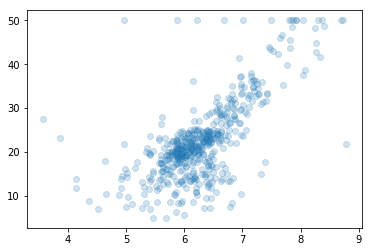

In [13]:
plt.scatter(x,y,alpha=0.2)

In [14]:
np.max(y)

50.0

In [15]:
x = x[y<50.0]
y = y[y<50.0]

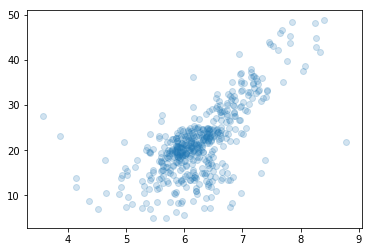

In [19]:
plt.scatter(x,y,alpha=0.2)
plt.show()

## 最小二乘法公式

https://github.com/toreydai/ml-study-tasks/blob/master/images/least_squares_method.jpg

## Python实现线性回归

In [55]:
class SimpleLinearRegression1:

    def __init__(self):
        """初始化Simple Linear Regression 模型"""
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """根据训练数据集x_train,y_train训练Simple Linear Regression模型"""
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        num = 0.0
        d = 0.0
        
        for x,y in zip(x_train,y_train):
            num += (x - x_mean) * (y - y_mean)
            d   += (x - x_mean) ** 2
            
        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        """给定待预测数据集x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        """给定单个待预测数据x，返回x的预测结果值"""
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression1()"

## Numpy实现线性回归

In [26]:
class SimpleLinearRegression2:

    def __init__(self):
        """初始化Simple Linear Regression模型"""
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """根据训练数据集x_train,y_train训练Simple Linear Regression模型"""
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
            
        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        """给定待预测数据集x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        """给定单个待预测数据x_single，返回x_single的预测结果值"""
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression2()"

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

## 使用算法2

In [91]:
reg = SimpleLinearRegression2()
reg.fit(x_train,y_train)

SimpleLinearRegression2()

In [92]:
print("a={},b={}".format(reg.a_,reg.b_))

a=8.876482297317693,b=-33.23248247773017


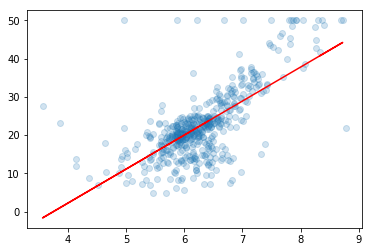

In [93]:
plt.scatter(x,y, alpha=0.2 )
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [94]:
y_predict = reg.predict(x_test)
print(y_predict[:10])

[38.39185318 17.47886089 34.3175478  23.36396865 36.66981561 19.44943996
 28.46794597 21.89934907 22.05912575 26.00916037]


## 使用算法1

In [66]:
reg2 = SimpleLinearRegression1()
reg2.fit(x_train, y_train)

SimpleLinearRegression1()

In [67]:
print("a={},b={}".format(reg2.a_,reg2.b_))

a=8.437224582644854,b=-31.118227013322528


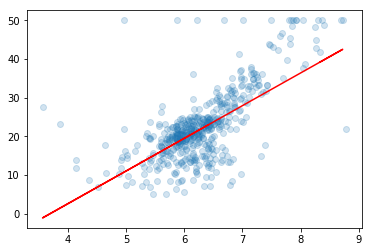

In [95]:
plt.scatter(x,y, alpha=0.2 )
plt.plot(x_train, reg2.predict(x_train), color='r')
plt.show()

In [96]:
y_predict = reg2.predict(x_test)
print(y_predict[:10])

[36.96173814 17.08363703 33.08905206 22.67751693 35.32491658 18.95670088
 27.52892106 21.28537487 21.43724491 25.19180985]


## MSE均方误差

In [97]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
print(mse_test)

44.72390607439173


## RMSE均方根误差

In [100]:
from math import sqrt

rmse_test = sqrt(mse_test)
print(rmse_test)

6.6875934441614895


## MAE平均绝对误差

In [101]:
mae_test = np.sum(np.absolute(y_predict- y_test)) / len(y_test)

print(mae_test)

4.760885541989788


## 完整实现

In [75]:
class LinearRegression2:

    def __init__(self):
        """初始化Simple Linear Regression 模型"""
        self.coef_ = None
        self.interception_ = None
        self._theta = None

    def fit(self, X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0], "the size of x_train must be equal to the size of y_train"
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train);
        
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]        

        return self

    def predict(self, X_predict):
        assert X_predict.shape[1] == len(self.coef_), " X_predict must be equal to X_train "
        
        X_b = np.hstack([ np.ones((len(X_predict), 1)), X_predict])
        
        return X_b.dot(self._theta)
    
    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return self.r2_score(y_test, y_predict)
    
    def mean_squared_error(self, y_true, y_predict):
        """计算y_true和y_predict之间的MSE"""
        assert len(y_true) == len(y_predict), "the size of y_true must be equal to the size of y_predict"

        return np.sum((y_true - y_predict)**2) / len(y_true)
    def root_mean_squared_error(self, y_true, y_predict):
        """计算y_true和y_predict之间的RMSE"""

        return sqrt(self.mean_squared_error(y_true, y_predict))
    
    def mean_absolute_error(self, y_true, y_predict):
        """计算y_true和y_predict之间的MAE"""
        assert len(y_true) == len(y_predict), \
            "the size of y_true must be equal to the size of y_predict"

        return np.sum(np.absolute(y_true - y_predict)) / len(y_true)
    def r2_score(self, y_true, y_predict):
        """计算y_true和y_predict之间的R Square"""

        return 1 - self.mean_squared_error(y_true, y_predict)/np.var(y_true)
    def __repr__(self):
        return "LinearRegression2()"

In [76]:
reg3 = LinearRegression2()

In [77]:
X = boston.data
y = boston.target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [80]:
reg3.fit(X_train, y_train)

LinearRegression2()

In [81]:
reg3.interception_

44.873191962382506

In [82]:
reg3.coef_

array([-1.13116624e-01,  6.89471243e-02, -1.28271100e-03,  1.51937230e+00,
       -2.06619514e+01,  3.16144443e+00,  4.25440077e-03, -1.94489787e+00,
        3.43795353e-01, -1.62172727e-02, -9.37360214e-01,  8.44440976e-03,
       -5.18957513e-01])

In [83]:
reg3.score(X_test, y_test)

0.6834334044962296